#GROUP 3
'Topic': {''}
    'Members': {'Aidai', 'Betty', 'Joshua'}
        'Supervisor': {'Prof Hannet', 'Stephen'}
            'Note': {'all group members contributed fairly for the success of this project'}

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese 
banking institution. 
The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [1]:
# The required libraries are imported below
# Kindly refer to requirements.txt file for versions of each library

import pandas as pd # to analyze data

import numpy as np # (numerical python) for working with arrays

import matplotlib.pyplot as plt # For plotting of graphs
%matplotlib inline
import matplotlib as mpl # For visualisation of data
import seaborn as sns # For visualisation of data
sns.set_style('white')

from sklearn import metrics
from sklearn import preprocessing # For Data Preprocessing 
from sklearn.preprocessing import MinMaxScaler # For Scaling of Data
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
#pd.set_option('max_columns', 100)
pd.options.display.max_columns = 65

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.
Waskom, M. et al., 2017. mwaskom/seaborn: v0. 8.1 (September 2017), Zenodo.
McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).
Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2. 

In [2]:
# Initial instructions
import os
cwd = os.getcwd()
print('unzip attached folder name group3_ml')
print('drop group3_ml in folder', cwd, 'on your computer')

unzip attached folder name group3_ml
drop group3_ml in folder /Users/kofi/Desktop on your computer


In [3]:
# Read dataframe

fd_file_path = 'group3_ml/bank-additional-full.csv'
bank = pd.read_csv(fd_file_path, sep = ";")


bank_df = bank.copy() # create a copy of data

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

We used 41188 with 21 variables which is very close to the data analyzed by [Moro et al., 2014]

In [ ]:
# DETAILED FEATURE EXPLATION
""" 
Description of input variables:
--bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
 related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is notknown before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should bediscarded if the intention is to have a realistic predictive model.
--other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
--social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

"""

In [4]:
# View top 10 rows in the dataset
bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# View the last 10 rows in the dataset
bank_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
#View the data structure
# There are no null values
# There are 21 variables
# 11 Variables are of type 'object'
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Rename target variable 'y' to 'subscribe'
# Convert object datatype to categorical to save memory and for easy manipulation
bank_df = bank_df.rename(columns={'y': 'subscribe'})
bank_df = bank_df.astype({"job":'category', "marital":'category', "education":'category', "default":'category'})
bank_df = bank_df.astype({"loan":'category',"contact":'category', "month":'category',"day_of_week":'category'})
bank_df = bank_df.astype({"housing":'category', "subscribe":'category', "poutcome":'category'})

In [8]:
# coding the target variable {yes, no} to {0,1}
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
bank_df['subscribe'] = LabelEncoder_y.fit_transform(bank_df['subscribe'])

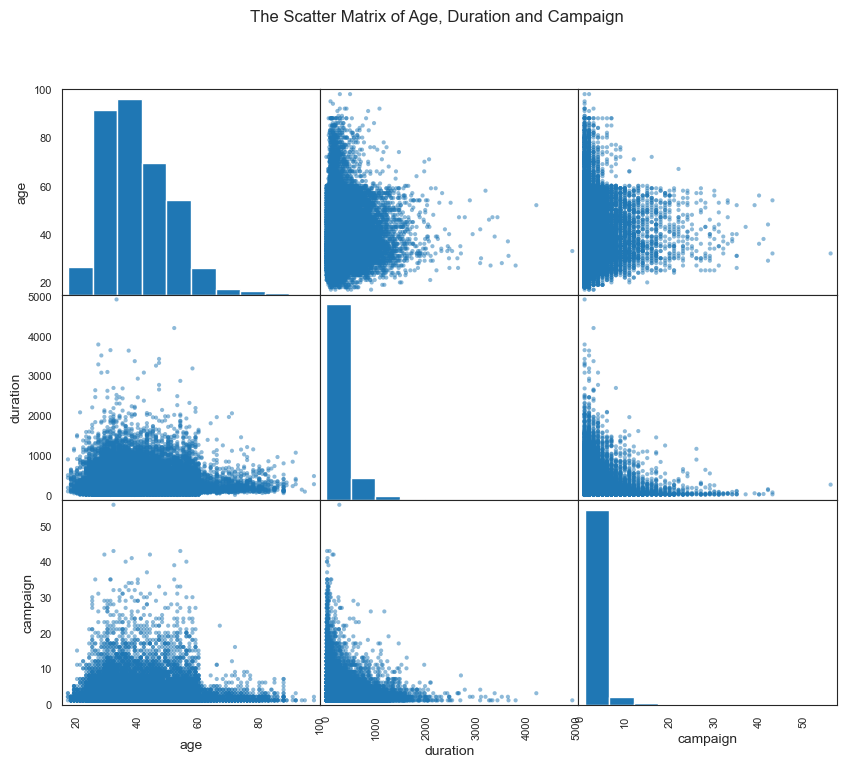

In [9]:
#sns.pairplot(bank_df)
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(bank_df[['age', 'duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Duration and Campaign')
plt.show()

#from pandas.plotting import scatter_matrix
#matrix = scatter_matrix(bank_df[['age','duration','campaign']],figsize=(10,8))

#plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
#plt.show()


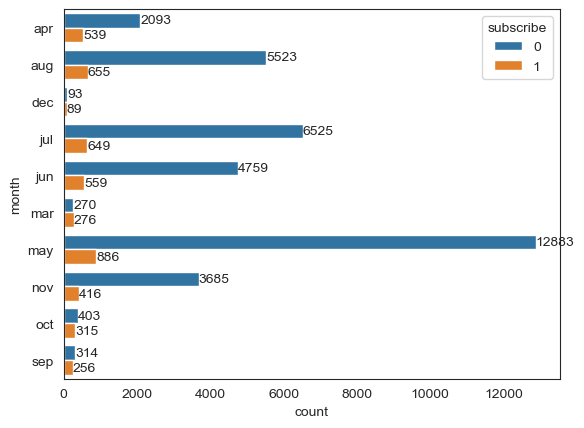

In [10]:
# Ploting month vs subscription { month did not have significant influence on deposit subscription}
# 
ax = sns.countplot(y='month', hue='subscribe', data=bank_df)
for i in ax.containers:
    ax.bar_label(i,)

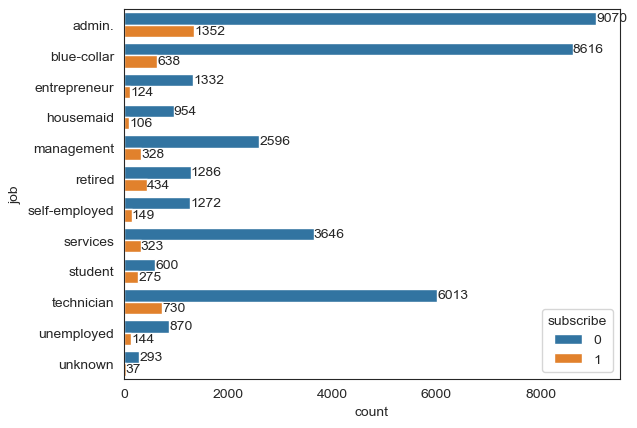

In [11]:
# Ploting month vs subscription { month did not have significant influence on deposit subscription}
# 
ax = sns.countplot(y='job', hue='subscribe', data=bank_df)
for i in ax.containers:
    ax.bar_label(i,)

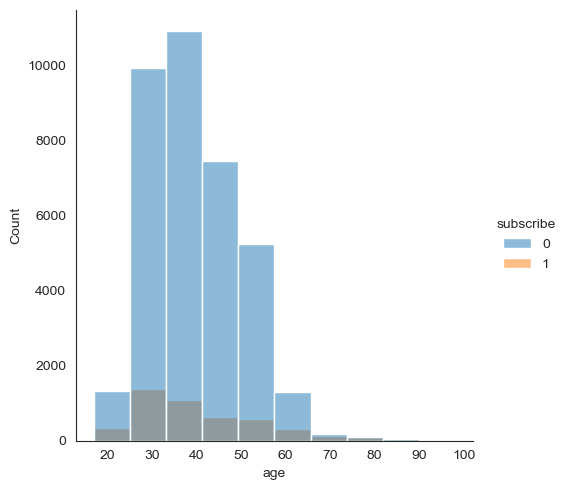

In [12]:
#bank_df.hist(bins=10, figsize=(20,15))
#plt.show()
sns.color_palette("flare", as_cmap=True)

ax = sns.displot(bank_df, hue='subscribe', bins=10, x='age')
#for i in ax.containers:
    #ax.bar_label(i,)

#sns.displot(bank_df, hue='subscribe', bins=10, x='age', y='duration')

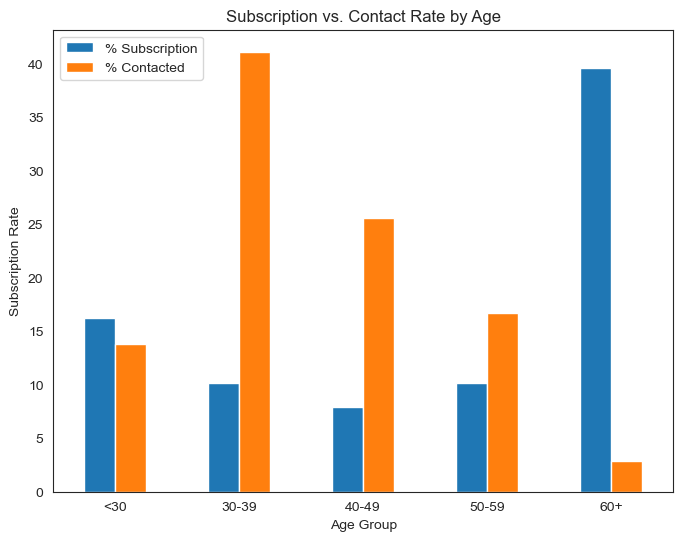

In [13]:
lst = [bank_df]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(bank_df['subscribe'],
                                     bank_df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(bank_df['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct[1]
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6)) #color = ('green','red')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

<AxesSubplot:xlabel='duration', ylabel='age'>

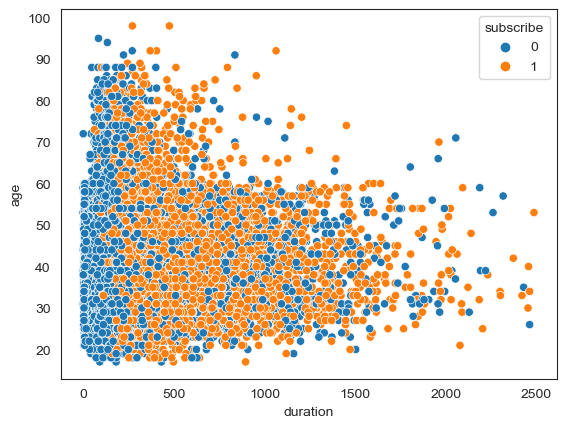

In [14]:
# Age vs duration of calls for each target class

bank_df__ = bank_df[bank_df['duration']<2500] # remove outliears above 2500

sns.scatterplot(data=bank_df__, y='age', x='duration', hue='subscribe')

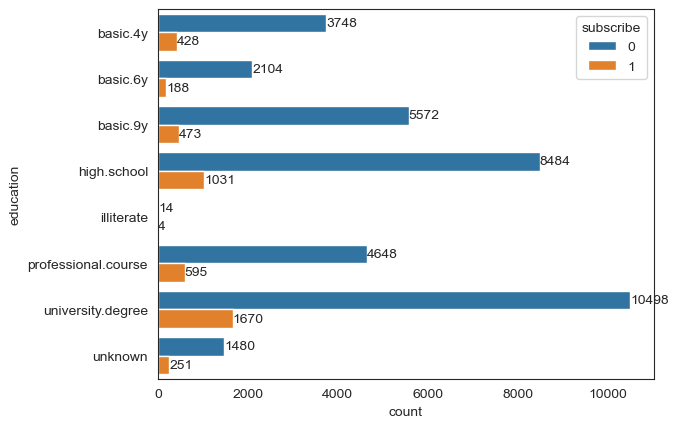

In [15]:
# Deposit subscription per education level
ax = sns.countplot(y='education', hue='subscribe', data=bank_df)
for i in ax.containers:
    ax.bar_label(i,)

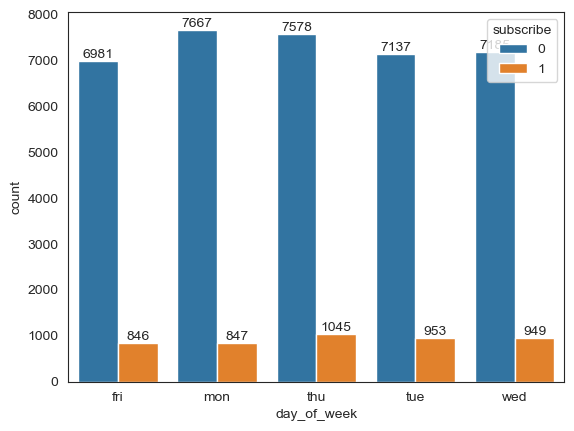

In [16]:
# Deposit subscription for each day of the weeek

ax = sns.countplot(x='day_of_week', hue='subscribe', data=bank_df)
for i in ax.containers:
    ax.bar_label(i,)

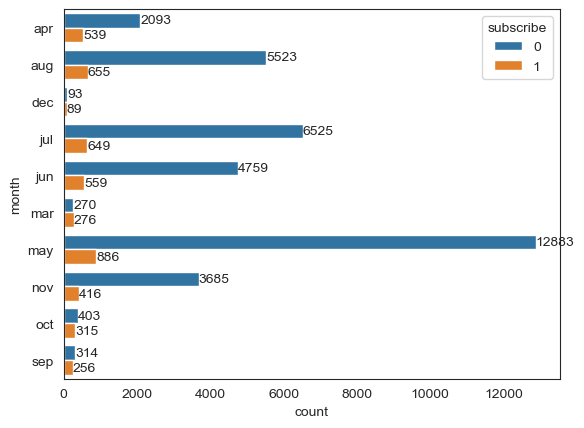

In [17]:
# Deposit subscription fro each mouth

bank_df_ = bank_df['duration']
ax = sns.countplot(y='month', hue='subscribe', data=bank_df)
for i in ax.containers:
    ax.bar_label(i,)

In [18]:
# This function check 'unknown' and 'other' values in dataframe
# Default has more than 20% unknown values. We shall delve further to correct this anomaly
# Other variables have less than 5% unknown values

def unknown_values(bank_df):
    unknown_val = []
    for i in list(bank_df.columns):
        
        gh = len(bank_df[bank_df[i]=='unknown']) #count unknow values
        
        if (gh>0):
            unknown_val.append({
                'Column': i,
                'Total Records': len(bank_df),
                'Unknown': gh,
                '% Unknown': np.round((gh/(len(bank_df))*100),2),
            })
            
    unknown_val = pd.DataFrame(unknown_val)
    return unknown_val

unknown_values(bank_df)

,Column,Total Records,Unknown,% Unknown
0,job,41188,330,0.80
1,marital,41188,80,0.19
2,education,41188,1731,4.20
3,default,41188,8597,20.87
4,housing,41188,990,2.40
5,loan,41188,990,2.40


In [19]:
# Further analysis indicates only 3,288 have  persons have defaulted on their loans.
# This indicates
bank_df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [20]:
# Code below shows 3457 who do not have any form loans has 'default' wrongly classified as unknown. 
# We will change their default status to 'no'

        
# Changes default status to no
bank_df.loc[((bank_df['loan']=='no') & 
                  (bank_df['housing']=='no') & 
                  (bank_df['default']=='unknown')),'default'] = 'no'

In [21]:
# print out the percentage unknow values after correction
print(unknown_values(bank_df))

      Column  Total Records  Unknown  % Unknown
0        job          41188      330       0.80
1    marital          41188       80       0.19
2  education          41188     1731       4.20
3    default          41188     5140      12.48
4    housing          41188      990       2.40
5       loan          41188      990       2.40


In [22]:
# Check for missing values
#None of the features contain missing values
print(bank_df.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
age_group         0
dtype: int64


In [23]:
# Compute summary statistics and round to 2 decimal places
# The minimum value for duration is zero.
print(bank_df.describe().transpose().round(2))

                  count     mean     std      min      25%      50%      75%  \
age             41188.0    40.02   10.42    17.00    32.00    38.00    47.00   
duration        41188.0   258.29  259.28     0.00   102.00   180.00   319.00   
campaign        41188.0     2.57    2.77     1.00     1.00     2.00     3.00   
pdays           41188.0   962.48  186.91     0.00   999.00   999.00   999.00   
previous        41188.0     0.17    0.49     0.00     0.00     0.00     0.00   
emp.var.rate    41188.0     0.08    1.57    -3.40    -1.80     1.10     1.40   
cons.price.idx  41188.0    93.58    0.58    92.20    93.08    93.75    93.99   
cons.conf.idx   41188.0   -40.50    4.63   -50.80   -42.70   -41.80   -36.40   
euribor3m       41188.0     3.62    1.73     0.63     1.34     4.86     4.96   
nr.employed     41188.0  5167.04   72.25  4963.60  5099.10  5191.00  5228.10   
subscribe       41188.0     0.11    0.32     0.00     0.00     0.00     0.00   
age_group       41188.0    35.38   10.15

In [24]:
# Count the values 
# Other variables are described in the thesis
print(bank_df['education'].value_counts())

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [25]:
# subscription classes and classification balance

print('Client who Subscribed = ',len(bank_df[bank_df['subscribe']==1]))
print('Client who did Subscribed = ',len(bank_df[bank_df['subscribe']==0]))
print( 'Classification balance =', round((len(bank_df[bank_df['subscribe']==1]) / 
                                          len(bank_df) *100),2),"%");

Client who Subscribed =  4640
Client who did Subscribed =  36548
Classification balance = 11.27 %


In [26]:
# encoding of variables

from sklearn.preprocessing import LabelEncoder
LabelEncoder_y = LabelEncoder()
bank_df['subscribe'] = LabelEncoder_y.fit_transform(bank_df['subscribe'])
bank_df['month'] = LabelEncoder_y.fit_transform(bank_df['month'])
bank_df['day_of_week'] = LabelEncoder_y.fit_transform(bank_df['day_of_week'])


<AxesSubplot:>

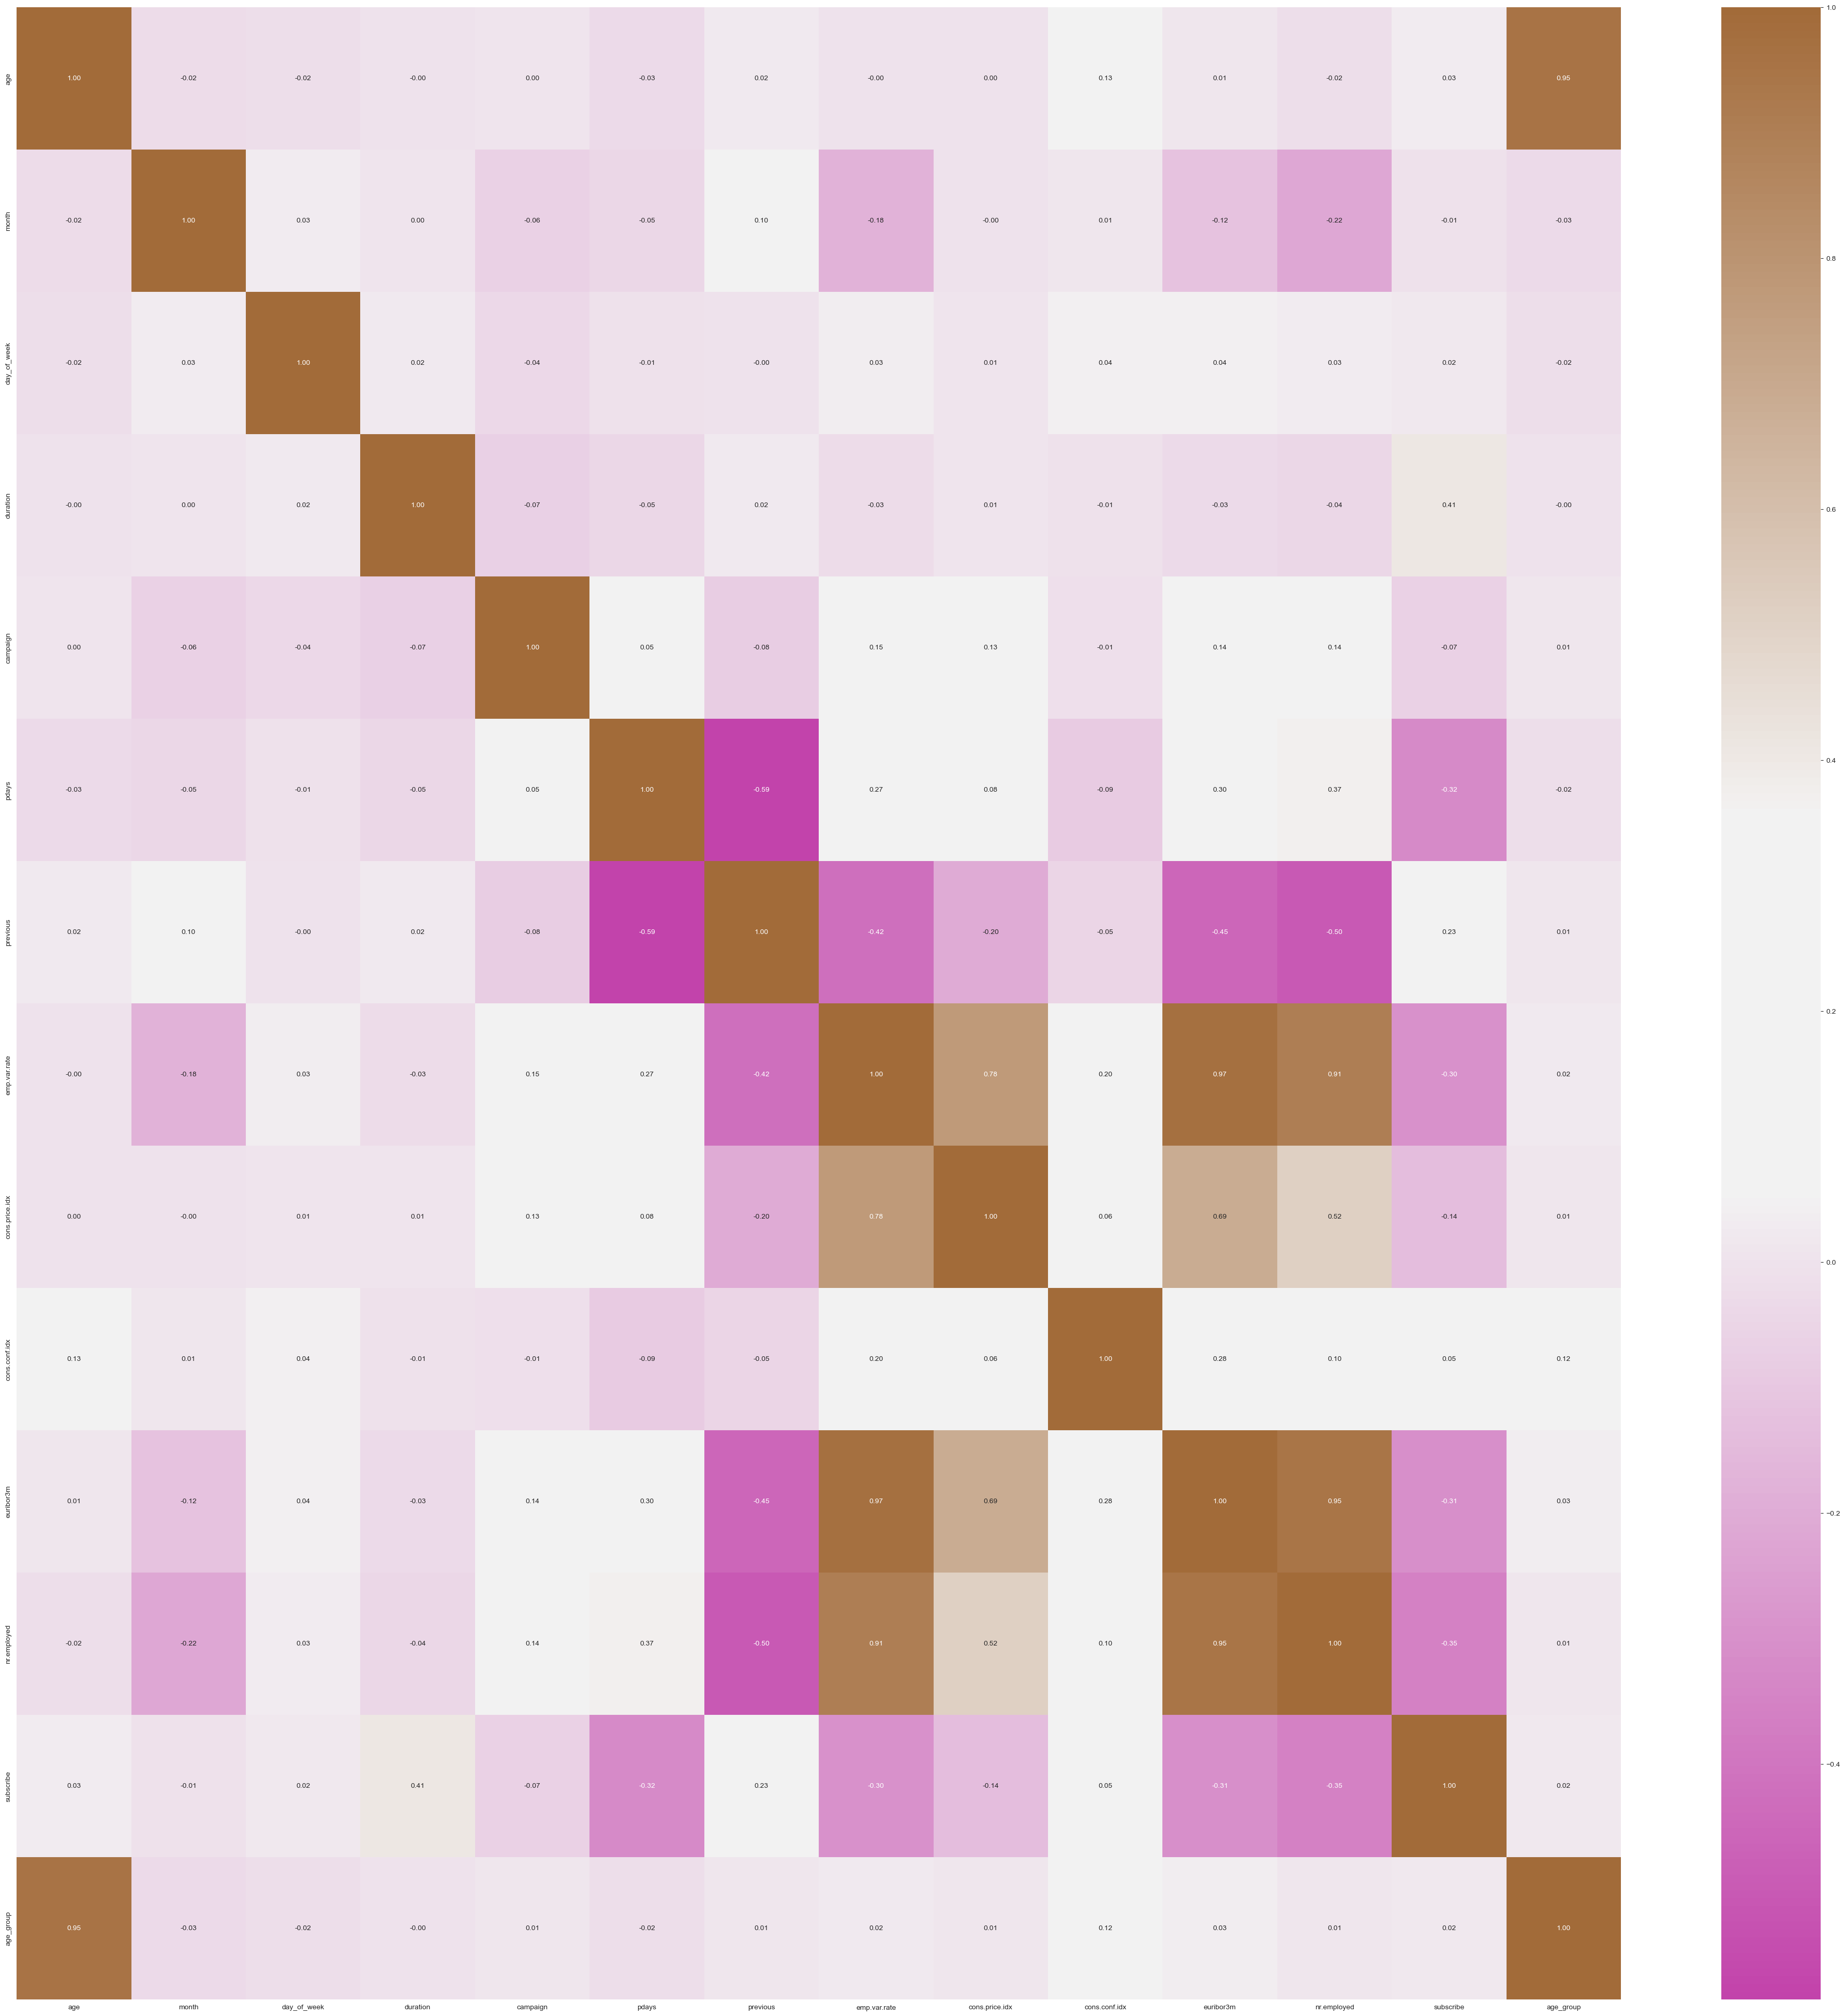

In [27]:
# plot heatmat of covariance matrix 

cmap = sns.diverging_palette(320, 40, sep=50, as_cmap=True)
plt.figure(figsize=(50,50)) # area of plot
sns.heatmap(bank_df.corr(), annot=True, cmap=cmap, fmt='.2f')

In [28]:
# creating dummies for categorical variables
dummies_df = pd.get_dummies(bank_df)

bank_df = dummies_df
#print(bank_df)

<AxesSubplot:>

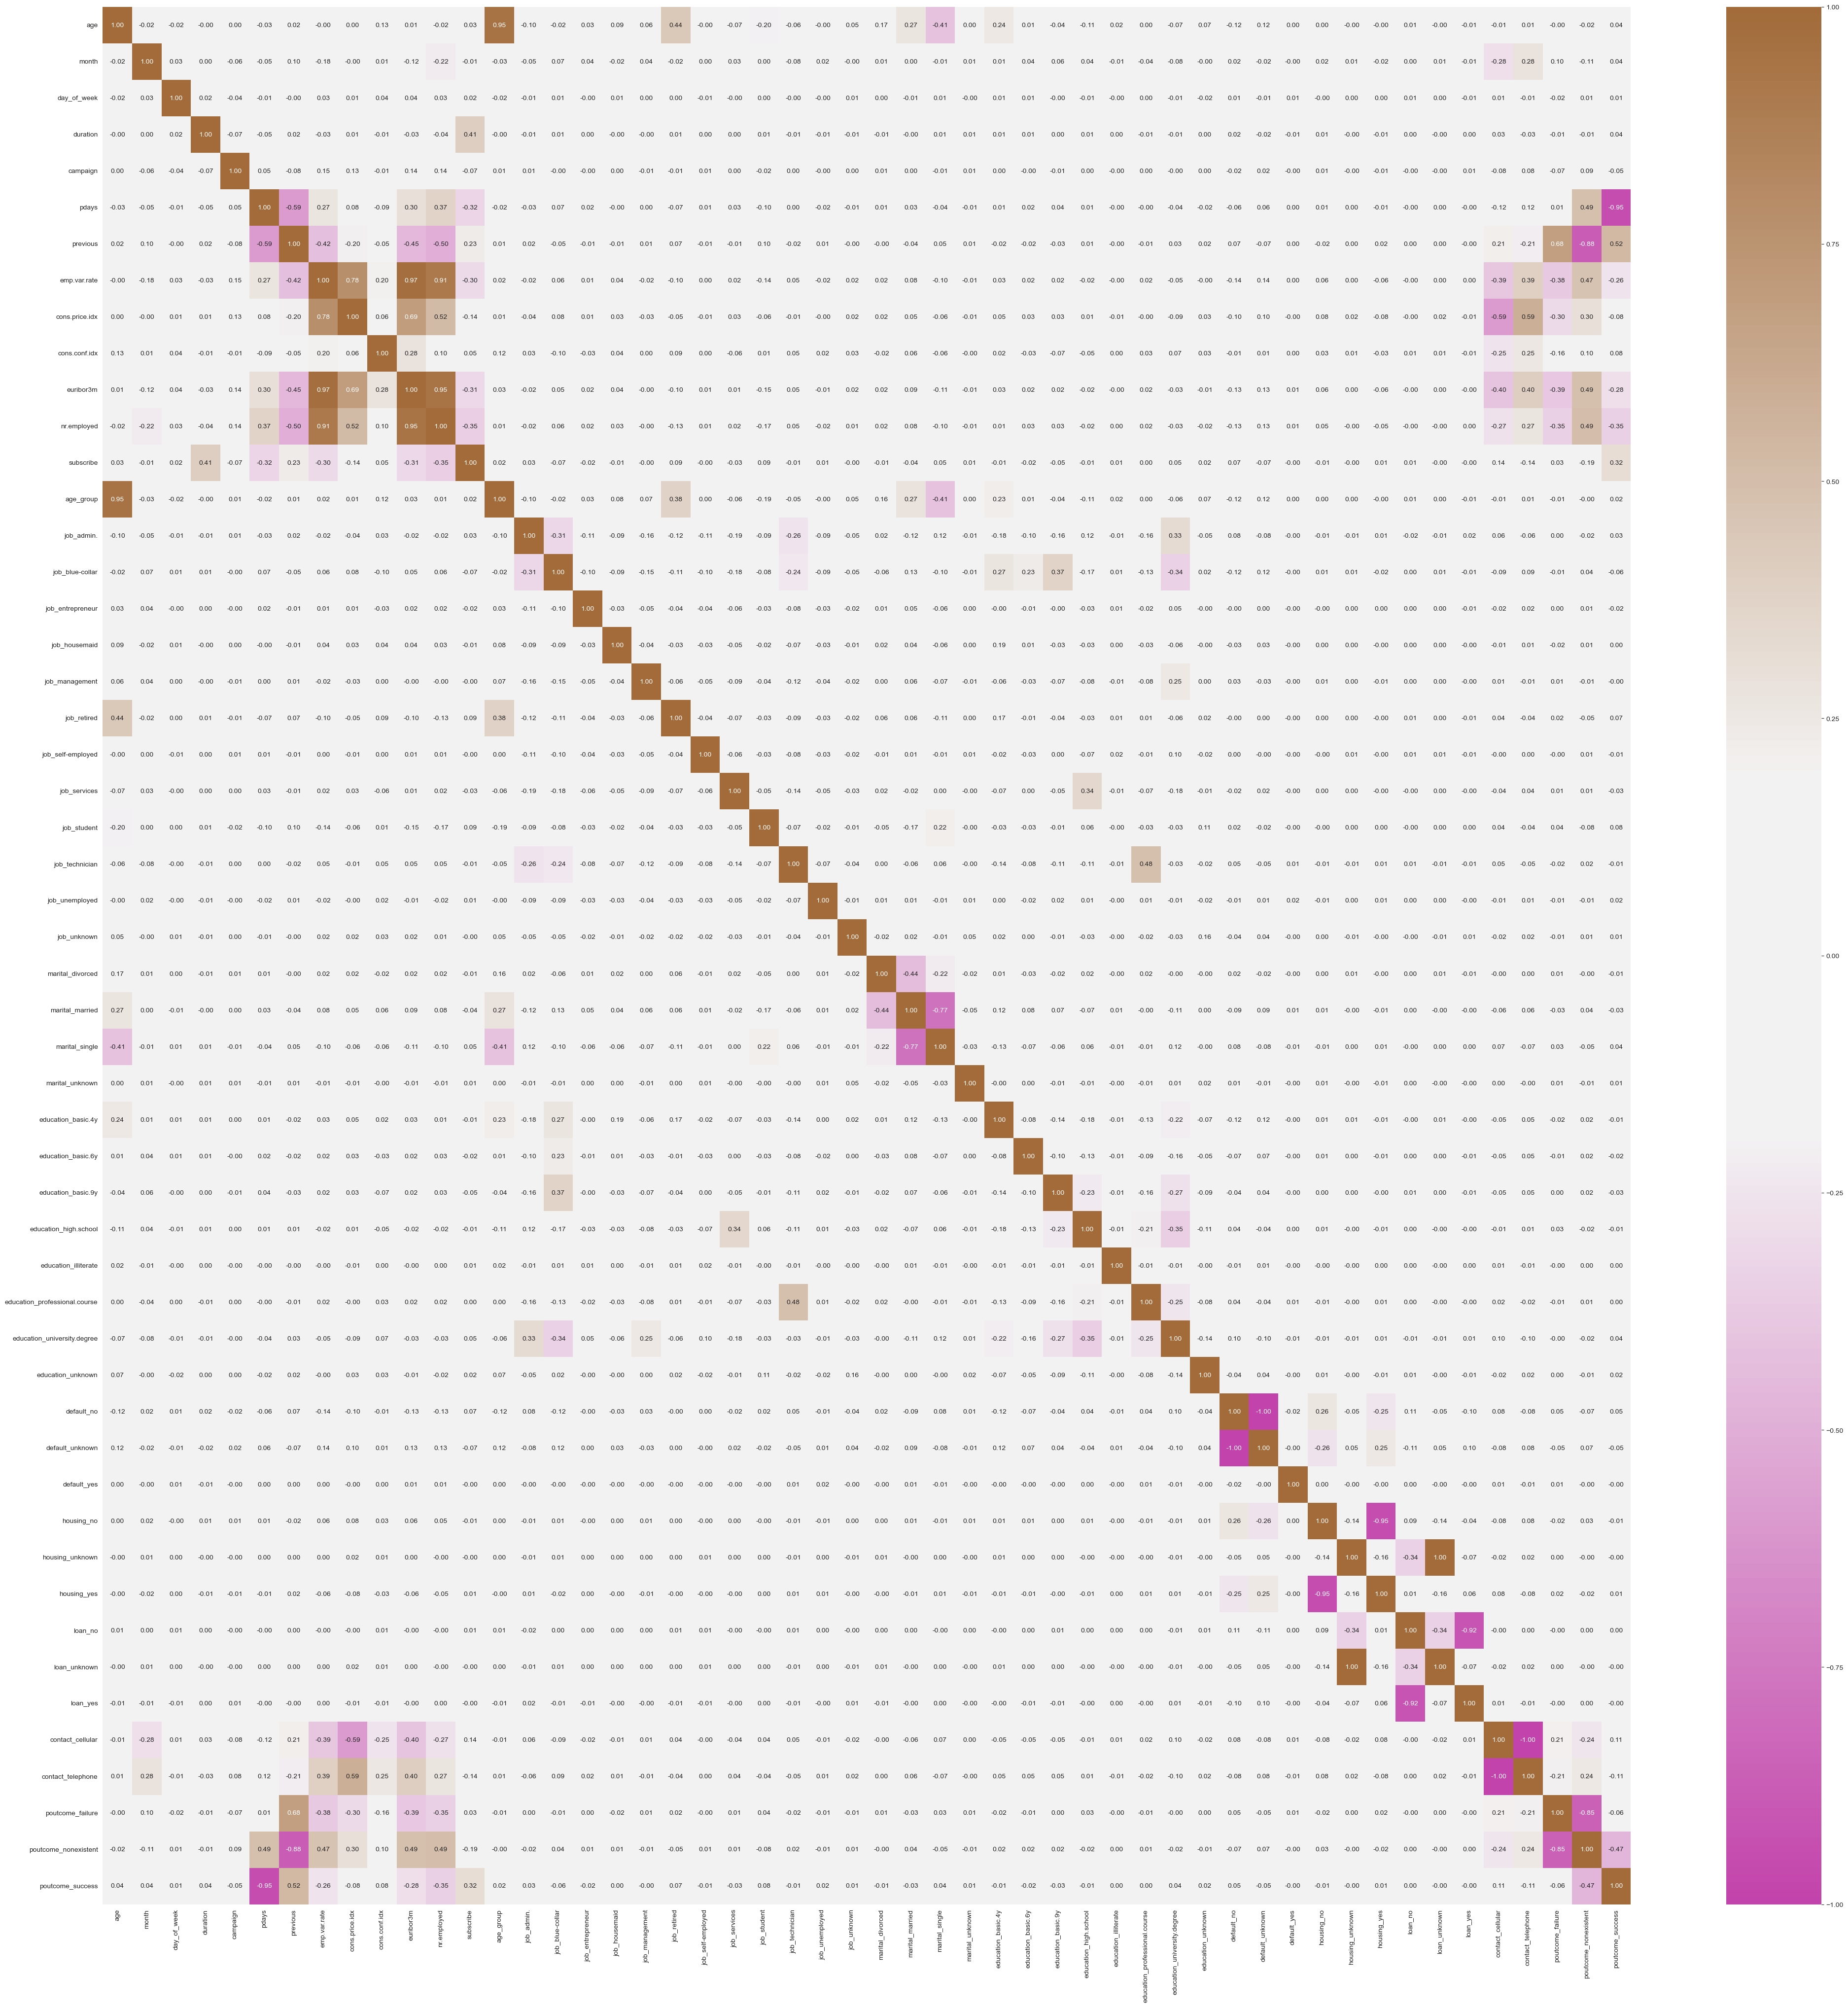

In [29]:
# plot heatmat of covariance matrix after creating dummy variables

cmap = sns.diverging_palette(320, 40, sep=50, as_cmap=True)
plt.figure(figsize=(50,50)) # area of plot
sns.heatmap(bank_df.corr(), annot=True, cmap=cmap, fmt='.2f')

In [30]:
corr_matrix = pd.DataFrame(round(bank_df.corr(),2))

In [31]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(V):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = V.columns
    vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]

    return(vif)
#V = bank_df.iloc[:,:-1]
#calc_vif(V)
#K = calc_vif(bank_df.iloc[:,:-1])


VIF = pd.DataFrame(calc_vif(bank_df.iloc[:,:-1])).sort_values(by=['VIF']) 
                                 
print(VIF)

/Users/kofi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                         features        VIF
2                     day_of_week   1.011501
4                        campaign   1.041998
3                        duration   1.232109
12                      subscribe   1.525677
1                           month   1.848514
9                   cons.conf.idx   3.601953
6                        previous   5.868994
8                  cons.price.idx   9.811480
13                      age_group  10.877618
0                             age  11.857891
5                           pdays  12.436394
49               poutcome_failure  32.007923
50           poutcome_nonexistent  39.820544
11                    nr.employed  43.240309
7                    emp.var.rate  44.253561
10                      euribor3m  96.439119
46                       loan_yes        inf
45                   loan_unknown        inf
44                        loan_no        inf
43                    housing_yes        inf
42                housing_unknown        inf
41        

In [32]:
# features after encoding categorical Data
print(pd.DataFrame(bank_df.columns))


                                0
0                             age
1                           month
2                     day_of_week
3                        duration
4                        campaign
5                           pdays
6                        previous
7                    emp.var.rate
8                  cons.price.idx
9                   cons.conf.idx
10                      euribor3m
11                    nr.employed
12                      subscribe
13                      age_group
14                     job_admin.
15                job_blue-collar
16               job_entrepreneur
17                  job_housemaid
18                 job_management
19                    job_retired
20              job_self-employed
21                   job_services
22                    job_student
23                 job_technician
24                 job_unemployed
25                    job_unknown
26               marital_divorced
27                marital_married
28            

<AxesSubplot:>

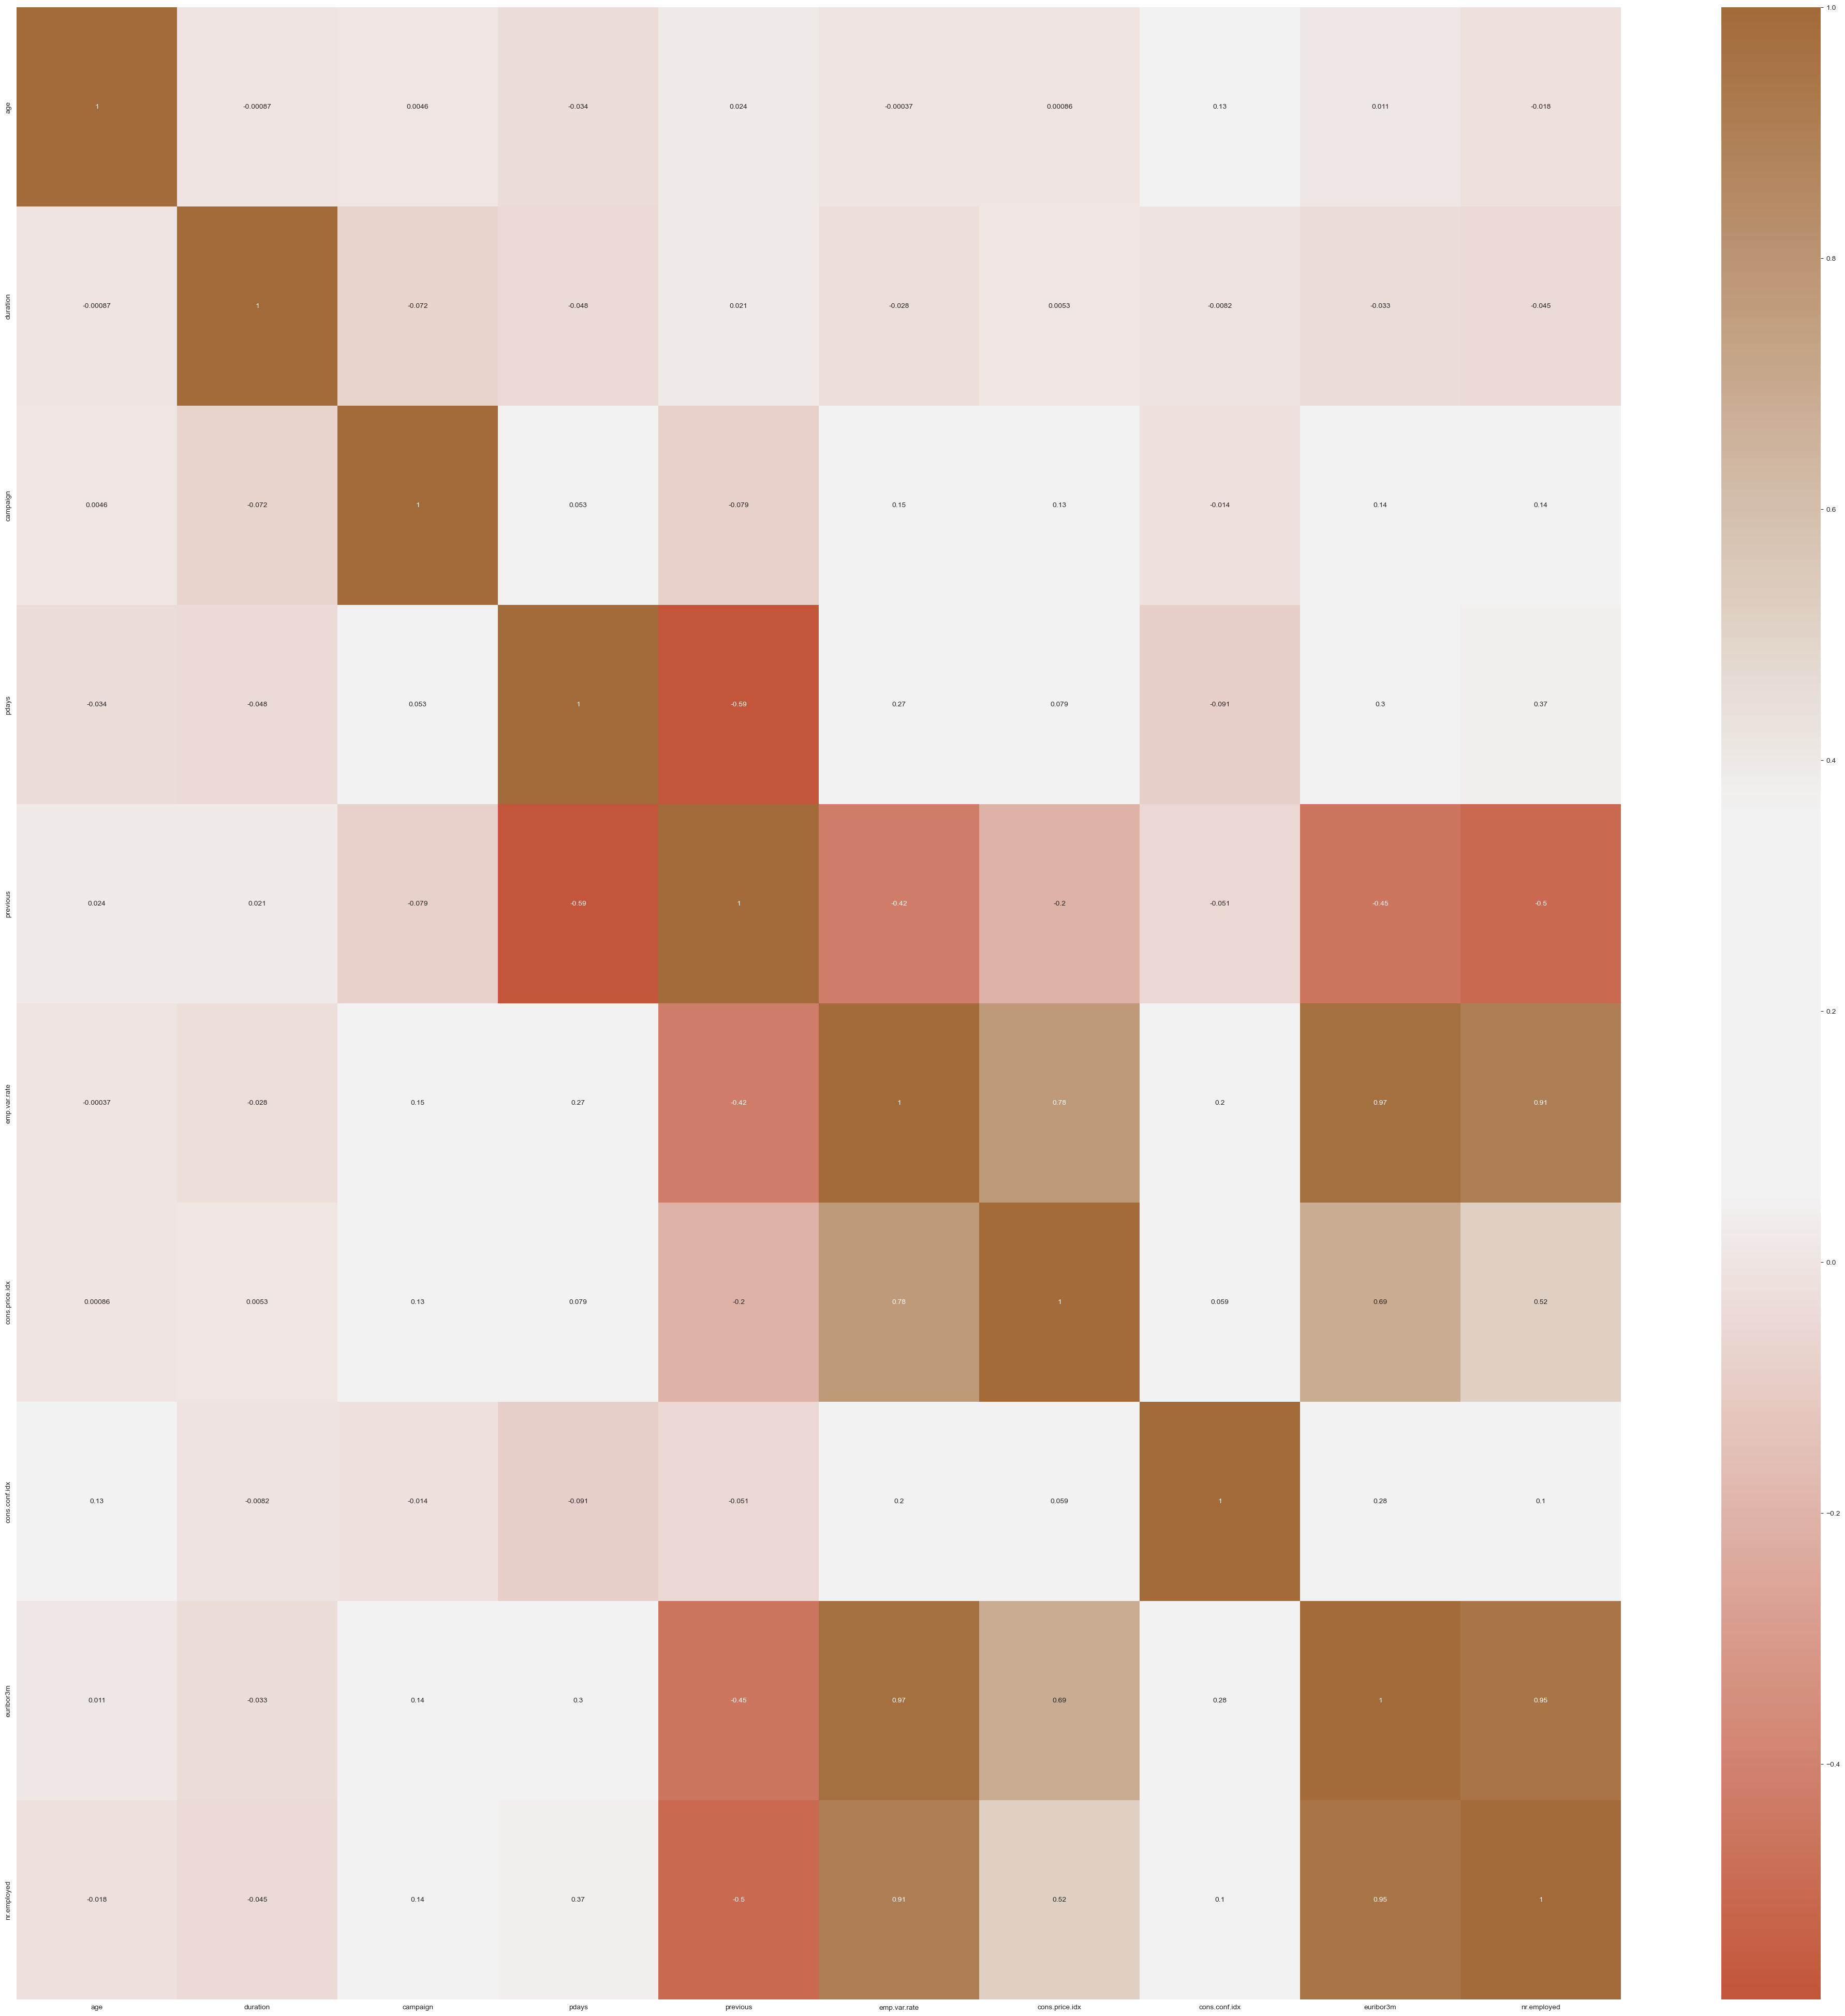

In [33]:

# Draw correlation matrix
cmap = sns.diverging_palette(20, 40, sep=50, as_cmap=True)
plt.figure(figsize=(50,50)) # area of plot
sns.heatmap(bank.corr(), annot=True, cmap=cmap)

In [34]:
# Selecting target and features
# y is the target
# x is the features
y = bank_df['subscribe']
X = bank_df.drop(['poutcome_success', 'marital_divorced', 'job_blue-collar', 'previous', 'marital_single', 'education_university.degree', 'pdays', 'default_no', 'housing_no', 'contact_cellular', 'contact_telephone', 'subscribe', 'loan_no', 'loan_unknown', 'poutcome_nonexistent', 'poutcome_failure', 'nr.employed', 'cons.price.idx', 'duration', 'cons.conf.idx', 'emp.var.rate'],axis=1)


In [35]:
# Split dataset into train and test set (80 to 20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Train Set:', X_train.shape, y_train.shape)
print('Test Set:', X_test.shape, y_test.shape)

Train Set: (32950, 31) (32950,)
Test Set: (8238, 31) (8238,)


In [36]:
# STANDARDIZATION using minimax scaling

mn_scaler = MinMaxScaler()

# fit scaler to the only train set to avoid leakage
mn_scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = mn_scaler.transform(X_train) # stores data in a form of numpy array
X_test_scaled = mn_scaler.transform(X_test)# apply fit to test 

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns) # add back column header names
X_test = pd.DataFrame(X_test_scaled, columns = X_train.columns)

In [37]:
# import machine learning models / algorithms
# Base models

from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.naive_bayes import GaussianNB  # Naive based
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.tree import DecisionTreeClassifier  # Decision tress
from sklearn import svm  # Support Vector Machine 
from sklearn.ensemble import AdaBoostClassifier  # ADA Boast 
from sklearn.neighbors import KNeighborsClassifier  #K Nearest Neighbor
from sklearn.neural_network import MLPClassifier # Nueral Network (a multi-layer perceptron)




# EVALUATE TRAINED MODEL PERFORMANCE¶
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# Create a dictionary for choosed models (Choice of machine learning models)
"""
DecisionTreeClassifier(), 
LogisticRegression(),  
RandomForestClassifier(),
svm.LinearSVC( C=1),
AdaBoostClassifier(), 
GaussianNB(), 
KNeighborsClassifier(), 
MLPClassifier()"""


ml_models = {'dt_model': DecisionTreeClassifier(), 'lr_model': LogisticRegression(),  'rf_model': RandomForestClassifier(),
             'svm_model': svm.LinearSVC( C=1), 'adlr_model': AdaBoostClassifier(), 
             'gnb_model': GaussianNB(), 'kn_model': KNeighborsClassifier(), 'nn_model': MLPClassifier()
            }

In [ ]:
# VALIDATION METHODS
"""
'Precision '
'Recall '
'f1_score '
'roc_auc '
"""


In [ ]:
# Fitting model and predict
scores_metric = []
cm_scores_metric = []


for clf in ml_models.values(): #(lr_model, dt_model, rf_model, svm_model, gnb_model, kn_model, nn_model, adlr_model, ad_model):
    clf.fit(X_train, y_train)
    y_predict_test = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_predict_test) # Confusion matrix
    
    fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
    
    scores_metric.append({ # Storing scores for each model
        'model': clf,
        'Precision %': np.round(metrics.precision_score(y_test,y_predict_test),2)*100,
        'Recall %': np.round(metrics.recall_score(y_test, y_predict_test),2)*100,
        'f1_score %': np.round(metrics.f1_score(y_test, y_predict_test),2)*100,
        'roc_auc %': np.round(metrics.roc_auc_score(y_test, y_predict_test),2)*100,
        #'fpr %': np.round(fpr,2)*100,
        #'tpr %': np.round(tpr,2)*100,

    })
    
    
    cm_scores_metric.append({
        
        'model': clf,
        'Confusion Matrix':  cm,
        'True Positive': cm[0, 0], # True Positive
        'False Positive': cm[0, 1], # False Positive
        'False Negative': cm[1, 0], # False Negative
        'True Negative': cm[1, 1],  # True Negative
        
    })
    

    



In [ ]:
# Convert base model results to data Frame and display results
summary_scores = pd.DataFrame(scores_metric, columns=['model', 'Precision %', 'Recall %', 'f1_score %',
                                                      'roc_auc %'])
 

cm = sns.light_palette('white',as_cmap=True)
K = summary_scores.style.background_gradient(cmap=cm)

K

In [ ]:
 # Summary of Confusion Matrix Report
c_matrix = pd.DataFrame(cm_scores_metric, index = ['a', 'b', 'c', 'd', 'e', 'g', 'h', 'i'], 
                        columns=['model', 'Confusion Matrix', 'True Positive', 'False Positive',
                                                'False Negative', 'True Negative'])
#class_report_summary = pd.DataFrame(scores_metric, columns=['model', 'class_report'])

cc = sns.light_palette('white',as_cmap=True)
s = c_matrix.style.background_gradient(cmap=cc)
s

In [ ]:
# Heat map of DecisionTreeClassifier() confusion matrix in percentage
p = c_matrix['Confusion Matrix']  
sns.heatmap(p[0]/np.sum(p[0]),fmt='.2%', annot=True, cmap='Blues')

In [ ]:
# Features importance of decision tree model

feature_importances_dt = pd.DataFrame(ml_models['dt_model'].feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(round(feature_importances_dt*100,2))

In [ ]:
#plt.figure(0).clf()
#lr_model, dt_model, rf_model, svm_model, gnb_model, kn_model, nn_model, adlr_model, ad_model
#fit logistic regression model and plot ROC curve


model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
auc = round(metrics.roc_auc_score(y_test, y_predict_test), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
auc = round(metrics.roc_auc_score(y_test, y_predict_test), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
auc = round(metrics.roc_auc_score(y_test, y_predict_test), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


model = svm.LinearSVC( C=1)
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
auc = round(metrics.roc_auc_score(y_test, y_predict_test), 4)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))


model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
auc = round(metrics.roc_auc_score(y_test, y_predict_test), 4)
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))


model = GaussianNB()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
auc = round(metrics.roc_auc_score(y_test, y_predict_test), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))


model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
auc = round(metrics.roc_auc_score(y_test, y_predict_test), 4)
plt.plot(fpr,tpr,label="K Neighbors, AUC="+str(auc))


model = MLPClassifier()
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
auc = round(metrics.roc_auc_score(y_test, y_predict_test), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))

#add legend
plt.legend()

In [ ]:
# Classification balance of about 11 % is very low.
# We want to resample to balance class sizes
# The code below does

#--------------------- Down Scaled Data -----------------------------

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
#print(sorted(Counter(y_resampled).items())
#y_resampled.value_counts()

X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

#--------------------------- upscaling
mn_scaler.fit(X_resampled)

# Transform train and test sets
X_resampled_train_scaled = mn_scaler.transform(X_resampled_train) # stores data in a form of numpy array
X_resampled_test_scaled = mn_scaler.transform(X_resampled_test)# apply fit to test 

X_train2 = pd.DataFrame(X_resampled_train_scaled, columns = X_train.columns) # add back column header names
X_test2 = pd.DataFrame(X_resampled_test_scaled, columns = X_train.columns)
y_train2 = y_resampled_train
y_test2 = y_resampled_test

# Print shape of train and test set after resampling

print('Train Set:', X_train2.shape)
print('Test Set:', X_test2.shape)
print('Train Set:', y_train2.shape)
print('Test Set:', y_test2.shape)

In [ ]:
# Running GridsearchCV for all models at the sametime posed a challenge for us
# we further reduced the number of parameters to be fined tuned due to limited computing resources and time constraints

scores_metricgs = [] # This will store the scores for each model
cm_scores_metricgs = [] # This will store the confusion matrix

In [ ]:
# This function implement GridsearchCV wiht 5 fold validation using 'recall' and 'roc_auc' as validation 

def grid_search_cv(model_parameters):
    
    for model_name, mp in model_parameters.items():
        scoring_cv = ['recall_macro', 'roc_auc']
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True, scoring=scoring_cv, 
                            refit='roc_auc', n_jobs=-1)
        clf.fit(X_train, y_train)
        y_predict_test = clf.predict(X_test)
                  
        cm = confusion_matrix(y_test, y_predict_test)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_test)
        auc = metrics.roc_auc_score(y_test, y_predict_test)
        
        jj = cv_results_
    
        scores_metricgs.append({
            'model': model_name, #clf,
            'Precision %': np.round(metrics.precision_score(y_test,y_predict_test, zero_division=0),2)*100,
            'Recall %': np.round(metrics.recall_score(y_test, y_predict_test, zero_division=0),2)*100,
            'f1_score %': np.round(metrics.f1_score(y_test, y_predict_test, zero_division=0),2)*100,
            'f1_score %': np.round(metrics.f1_score(y_test, y_predict_test, zero_division=0),2)*100,
            'roc_auc %': np.round(auc,2)*100,
            #'fpr': np.round(fpr,2)*100,
            #'tpr': np.round(fpr,2)*100,
        
        #tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        })
        cm_scores_metricgs.append({
        
            #'':  confusion_matrix(y_test, y_predict_test),
            'model': model_name, #clf,
            'True Positive': cm[0, 0],
            'False Positive': cm[0, 1],
            'False Negative': cm[1, 0], 
            'True Negative': cm[1, 1]
        
        })

In [ ]:

model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'), #solver='liblinear'
        'params': {
            'C': [1,5,10],
            'solver': ['liblinear', 'lbfgs' ], #,'newton-cg', 'sag', 'saga', 
            'max_iter': [500, 1000, 2000]
        }
    }
}
grid_search_cv(model_params)

fprl = fpr
tprl = tpr
aucl = auc




In [ ]:
# Random forest using gridsearch CV

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'max_features': [30, 20, 40]
        }
    }
}
grid_search_cv(model_params) # Call function 

fprr = fpr
tprr = tpr
aucr = auc




In [ ]:
# K Nearest Neighbor using gridsearch CV
model_params = {
    'knn' : {
        'model': KNeighborsClassifier(),
        'params': {
            'leaf_size': [1,10,20,50],
            'n_neighbors': [1,10,30],
            'p': [1,2],
            'weights': ['uniform','distance']
        }
    }
}

grid_search_cv(model_params) # Call function 

fprk = fpr
tprk = tpr
auck = auc



In [ ]:
# Neural Network using gridsearch CV
model_params = {
    'neural_network' : {
        'model': MLPClassifier(),
        'params': {
            'activation': ['identity', 'relu'],  #'tanh',  'logistic',
            'solver': ['lbfgs', 'sgd'], #'adam'
            'learning_rate': ['constant', 'invscaling'], #'adaptive'
            'max_iter': [2000, 1000] # '5000', '30000'
        }
    }
}
grid_search_cv(model_params) # Call function 
fprn = fpr
tprn = tpr
aucn = auc



In [ ]:
model_params = {
    'adaboost_DT' : {
        'model': AdaBoostClassifier(),
        'params': {
            'base_estimator': [DecisionTreeClassifier(), LogisticRegression()], #LogisticRegression()
            'n_estimators': [100, 1000],
            'learning_rate': [1, 2, 3]
        }  
    }
}
grid_search_cv(model_params) # Call function



fpra = fpr
tpra = tpr
auca = auc



In [ ]:
# Support Vector Machine using gridsearch CV
model_params = {
    'svm': {
        'model': svm.SVC(C=1),
        'params' : {
            'gamma': ['auto','scale'], #'C': [30,70,100], #,1000,3000,10000,30000
            'kernel': ['rbf','linear']
        }  
    }
}

grid_search_cv(model_params) # Call function 

fprs = fpr
tprs = tpr
aucs = auc



In [ ]:
summary_scoresgs = pd.DataFrame(scores_metricgs, columns=['model', 'Precision %', 'Recall %', 'f1_score %',
                                                          'f1_score %', 'roc_auc %'])

cm = sns.light_palette('white',as_cmap=True)
K = summary_scoresgs.style.background_gradient(cmap=cm)
K

In [ ]:
 # Confusion Matrix Report
c_matrix = pd.DataFrame(cm_scores_metricgs, columns=['model', 'True Positive', 'False Positive',
                                                'False Negative', 'True Negative'])
#class_report_summary = pd.DataFrame(scores_metric, columns=['model', 'class_report'])
#c_matrix
cc = sns.light_palette('white',as_cmap=True)
s = c_matrix.style.background_gradient(cmap=cc)
s

In [ ]:
# Heat map of DecisionTreeClassifier() confusion matrix in percentage
p = c_matrix['Confusion Matrix']  
sns.heatmap(p[0]/np.sum(p[0]),fmt='.2%', annot=True, cmap='Blues')

In [ ]:
plt.figure(0).clf()
#lr_model, dt_model, rf_model, svm_model, gnb_model, kn_model, nn_model, adlr_model, ad_model
#fit logistic regression model and plot ROC curve


plt.plot(fprl,tprl,label="Logistic Regression, AUC="+str(aucl))
plt.plot(fprr,tprr,label="Random Forest, AUC="+str(aucr))
plt.plot(fprs,tprs,label="Support Vector Machine, AUC="+str(aucs))
plt.plot(fpra,tpra,label="AdaBoost, AUC="+str(auca))
plt.plot(fprk,tprk,label="K Neighbors, AUC="+str(auck))
plt.plot(fprn,tprn,label="Neural Network, AUC="+str(aucn))



#add legend
plt.legend()

The dataset used did not have customer balance which is an important determinate for deposit subscription. Even though 
other dataset provided at UCI website had account balance, there was no index or common key on which we could merge the datasets.
There was no data on gender and number of dependents clients, interest rate offered by the bank, religious affiliation, call times, year, geographic location, . The branch network, size could also impact on deposit mobilization.
Other factors like the reputation of the bank, other marketing campaigns like tv, radio, online could contribute to the sucess of this campaign.
Other financial products offered by the bank, like call accounts, savings account could also carnibilize.

There was no enough data on the bank staff who conducted this exercise. The gender, education
qualification, the years of working experience, communication skills could also impact on outcome.
There was no data on the competitive landscape within the banking industry, other financial institions like insurance, investment management, pension funds and allied deposit institutions.
  
The research focused on existing customers of the bank, 
Even though there was data on inflation, which could act as a proxy for cost of living, the general macro economic enviroment can have impact.
The could be errors in data collection and processing. according to Sergio Moro the data was reduced to allow the data. sampling technique could also affect outcome of this thesis. 


Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.